# Analyzing output from results of CUDA benchmarks

## Using old output reading
* 0 - Mem total 
* 2 - Mem used
* 4 - Mem Free
* 6 - Power Drawed
* 8 - Clocks

## Using new output reading
* 0 - memory total 
* 1 - memory used 
* 2 - memory free 
* 3 - power drawed 
* 4- clocks 

In [1]:
#importing necessary libraries
import csv
import numpy as np
import os
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import pylab
import plotly.graph_objs as go
import pandas as pd

In [2]:
#Loading data
all_rates = glob.glob("combined_results/*.rate")
all_results = glob.glob("combined_results/*.results")
#f = open(data_file,"r")
#average_results()
#data_analysis()
#rate_data()

In [3]:
def splitting_data(f):
    lines = f.readlines()
    results = []
    for x in lines:
        results.append(x.split(None))
    f.close()
    return results


In [4]:
def average_results(f):
    #f = open("combined.n6200000b128.results","r")
    next(f)
    results = np.array(splitting_data(f))
    data_dic = {}
    #data_dic = []
    data_size = len(results)
    for col in range (5):
        total = 0
        for y in enumerate(results):
            #print(y)
            total += float(y[1][col])
        average = total/data_size

        data_dic[col] = (average)

    #print (data_dic[2])
    return (data_dic)

In [5]:
def rate_data(f):
    #files = glob.glob("*.rate")
    #f = open("combined.n1000b512.rate","r")
    results = np.array(splitting_data(f))
    #print(results)
    all_4 = results[4:]
    #print (all_4)
    rates = 0
    time = 0
    for i in all_4:
        rates += float(i[1])
        time += float(i[2])
    average_rate = (rates/4)
    average_time = (time/4)
    #print (average_rate, average_time)
    return average_rate, average_time


In [6]:
def rate_one(file):
    #file_rate = glob.glob("*.rate")
    rate_all_data = {"average rate": [ ], "average time":[ ]}
    f = open(file,"r")
    average_rate, average_time = rate_data(f)
    rate_all_data["average time"].append(average_time)
    rate_all_data["average rate"].append(average_rate)
    #print (rate_all_data)
    return rate_all_data


In [7]:
def results_one(files):
    #files = glob.glob("*.results")
    num = len(files)
    all_data = defaultdict(list)
    averages = {}
    f = open(files,"r")
    averages = average_results(f)
    #print("these are the averages: \n")
    #print (averages)
    for k,v in averages.items():
        all_data[k].append(v)
    return all_data

In [8]:
def spec_file(all_files,all_results):
    block_sizes = [128,256,512,1024]
    array_sizes = [10000,1000,100]
    all_data = {}
    rate_all= {}
    array_range = []
    for f in all_files:
        for j in range(100000,1000000,10000):
            if str(j) in f:
                array_range.append(j)
                rate_all[f] = rate_one(f)["average time"]
    ##TODO: be able to do rate and results at the same time, want to plot power against average time
    array_range_res = []
    for f in all_results:
        for j in range(100000,1000000,10000):
            if str(j) in f:
                array_range_res.append(j)
                all_data[f] = results_one(f)[3] #3 is power

    return all_data,rate_all

In [9]:
results_organized, rates_organized = spec_file(all_rates, all_results)

In [10]:
def array_file(all_files,all_results):
    block_sizes = [128,256,512,1024]
    array_sizes = [10000,1000,100]
    all_data = {}
    rate_all= {}
    asize_data = {}
    array_range = []
    for f in all_files:
        for j in range(100000,1000000,10000):
            if str(j) in f:
                array_range.append(j)
                rate_all[f] = rate_one(f)["average rate"]
                asize_data[f] = j 
    ##TODO: be able to do rate and results at the same time, want to plot power against average time
    array_range_res = []
    for f in all_results:
        for j in range(100000,1000000,10000):
            if str(j) in f:
                array_range_res.append(j)
                all_data[f] = results_one(f)[3] #3 is power
    return all_data,rate_all,asize_data

results_organized, rates_organized, asize_organized = array_file(all_rates, all_results)

### results-contains average power, rate-contains average time

In [11]:
def by_block(dic_data):
    block_sizes = {"128": [ ],"256":[ ],"512":[ ],"1024":[ ]}
    bits_128 = []
    bits_256 = []
    bits_512 = []
    bits_1024 = []
    results_combined = {"128": bits_128,"256":bits_256,"512":bits_512,"1024":bits_1024}

    example= "this is 128"
    for k,v in block_sizes.items():
        for key,val in dic_data.items():
            if k in key:
                results_combined[k].append(val)
    return results_combined
    
            

In [12]:
block_power = by_block(results_organized)
block_rate = by_block(rates_organized)
block_asize = by_block(asize_organized)
#plt.scatter(results_organized.values(),bits_128)

In [13]:
print (len(block_power['128']))
print (len(block_rate['128']))
print (len(block_rate['128']))
print (len(block_rate['1024']))
print (block_asize['1024'])

"""print (len(bits_1024))# do not use - only 787
print (len(bits_512)) # use
print (len(bits_256)) # use """

790
790
790
787
[800000, 930000, 220000, 720000, 570000, 410000, 390000, 690000, 560000, 880000, 840000, 350000, 650000, 400000, 310000, 970000, 620000, 170000, 470000, 830000, 790000, 290000, 750000, 400000, 550000, 940000, 130000, 930000, 800000, 610000, 310000, 140000, 440000, 480000, 520000, 450000, 970000, 760000, 260000, 530000, 390000, 840000, 170000, 710000, 540000, 900000, 580000, 660000, 430000, 130000, 870000, 600000, 300000, 150000, 450000, 810000, 260000, 190000, 490000, 310000, 770000, 270000, 520000, 960000, 630000, 910000, 520000, 700000, 590000, 860000, 370000, 670000, 120000, 740000, 490000, 230000, 730000, 560000, 920000, 350000, 890000, 220000, 380000, 340000, 640000, 410000, 110000, 850000, 700000, 820000, 630000, 330000, 160000, 780000, 280000, 990000, 950000, 740000, 240000, 670000, 510000, 740000, 240000, 950000, 320000, 990000, 280000, 250000, 160000, 460000, 630000, 330000, 820000, 590000, 770000, 850000, 110000, 340000, 640000, 380000, 680000, 890000, 920000,

'print (len(bits_1024))# do not use - only 787\nprint (len(bits_512)) # use\nprint (len(bits_256)) # use '

In [25]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font) 

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans



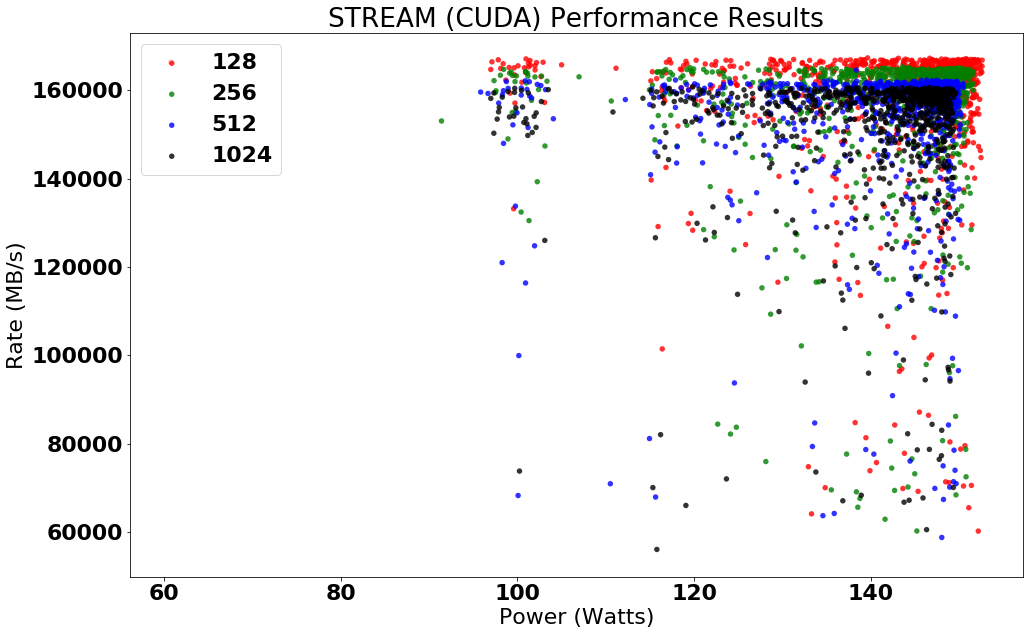

In [26]:
# Create plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)

blocks = ("128", "256", "512", "1024")
colors = ("red", "green", "blue", "black")

for block, color in zip(blocks, colors):
    ax.scatter(block_power[block], block_rate[block], alpha=0.8, c=color, edgecolors='none', s=30, label=block)
    
ax.set_xlabel("Power (Watts)")
ax.set_ylabel("Rate (MB/s)")
#ax.set_xlim([80,None]) 
#ax.set_ylim([0.0,0.00075])    
plt.title('STREAM (CUDA) Performance Results')
plt.legend(loc=2)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans



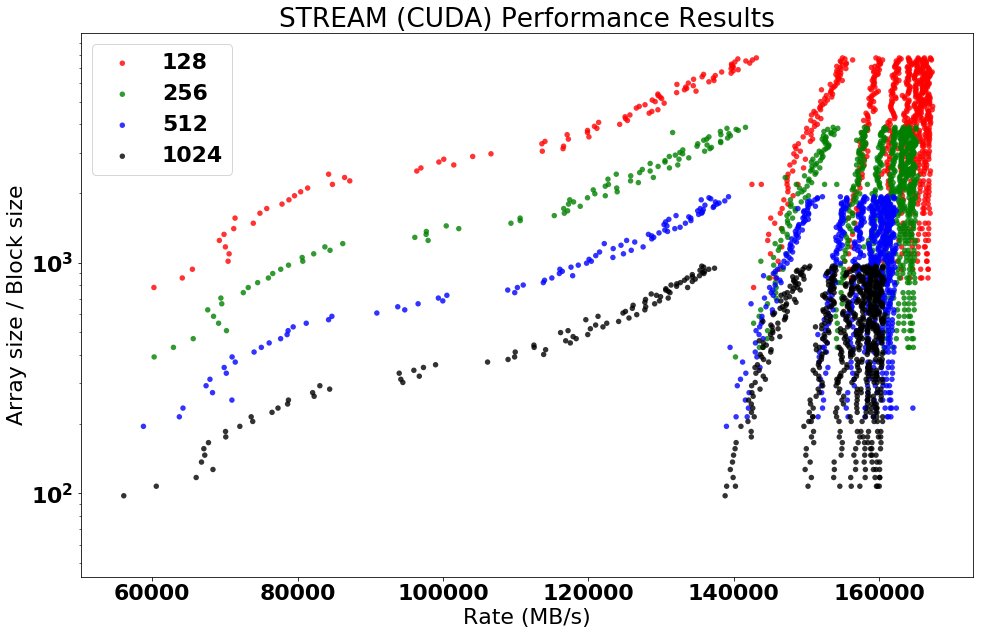

In [27]:
# Create plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)

blocks = ("128", "256", "512", "1024")
colors = ("red", "green", "blue", "black")

for block, color in zip(blocks, colors):
    new = []
    for v in block_asize[block]:
        new.append(v / int(block))
    #ax.scatter(block_rate[block], block_asize[block], alpha=0.8, c=color, edgecolors='none', s=30, label=block)
    ax.scatter(block_rate[block], new, alpha=0.8, c=color, edgecolors='none', s=30, label=block)
    
ax.set_xlabel("Rate (MB/s)")
ax.set_ylabel("Array size / Block size")
#ax.set_xlim([80,None]) 
#ax.set_ylim([0.0,0.00075])    
ax.set_yscale('log')
plt.title('STREAM (CUDA) Performance Results')
plt.legend(loc=2)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans



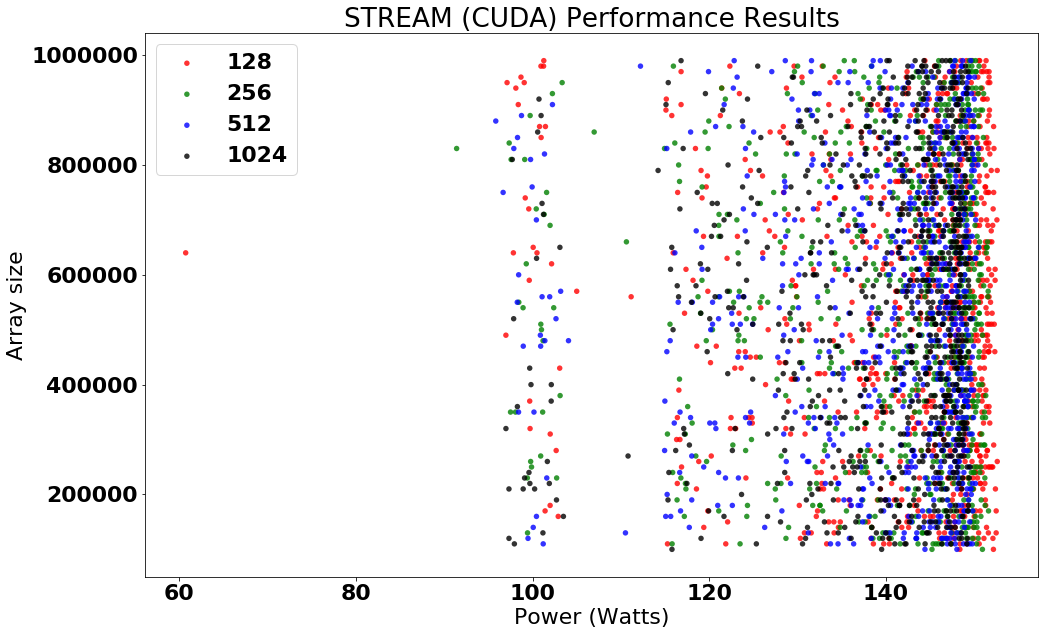

In [28]:
# Create plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)

blocks = ("128", "256", "512", "1024")
colors = ("red", "green", "blue", "black")

for block, color in zip(blocks, colors):
    ax.scatter(block_power[block], block_asize[block], alpha=0.8, c=color, edgecolors='none', s=30, label=block)

   
ax.set_xlabel("Power (Watts)")
ax.set_ylabel("Array size")
#ax.set_xlim([80,None]) 
#ax.set_ylim([0.0,0.00075])

plt.title('STREAM (CUDA) Performance Results')
plt.legend(loc=2)
plt.show()